In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# 1. 훈련 + 검증 데이터 병합
train_valid_files = [
    './data/2020년도 전처리.csv',
    './data/2021년도 전처리.csv',
    './data/2022년도 전처리.csv',
    './data/2023년도 전처리.csv',
    './data/2024년도 전처리.csv',
    './data/2025년도 전처리_may.csv'
]
df_train_valid = pd.concat([pd.read_csv(file) for file in train_valid_files], ignore_index=True)
df_train_valid.to_csv('x_train_valid.csv', index=False)

In [8]:
df1 = pd.read_csv('x_train_valid.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66300 entries, 0 to 66299
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          66300 non-null  object 
 1   release_date                   66300 non-null  object 
 2   type                           66300 non-null  object 
 3   runtime                        66300 non-null  float64
 4   season_count                   66300 non-null  float64
 5   episode_count                  66300 non-null  float64
 6   genre                          63278 non-null  object 
 7   director                       66300 non-null  object 
 8   cast                           66300 non-null  object 
 9   country                        66300 non-null  object 
 10  language                       66300 non-null  object 
 11  production_company             66300 non-null  object 
 12  synopsis                       61682 non-null 

In [10]:
df1['release_date'] = pd.to_datetime(df1['release_date'], errors='coerce')
df1['release_year'] = df1['release_date'].dt.year

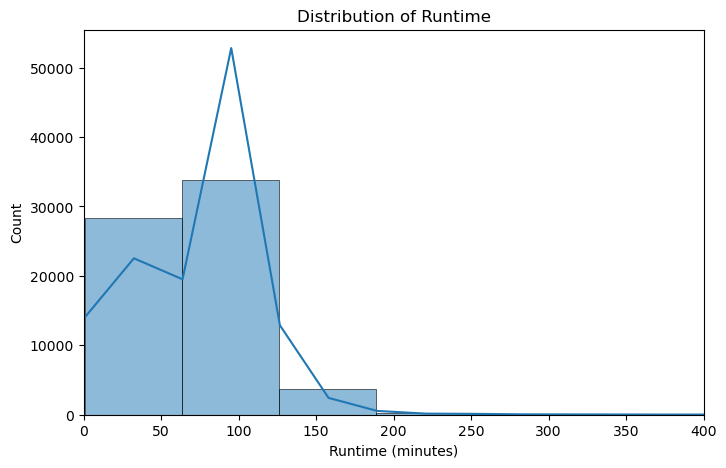

In [13]:
# 상영시간 분포
plt.figure(figsize=(8, 5))
sns.histplot(df1['runtime'], bins=100, kde=True)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.xlim(0, 400)  # 이상치 제외
plt.show()

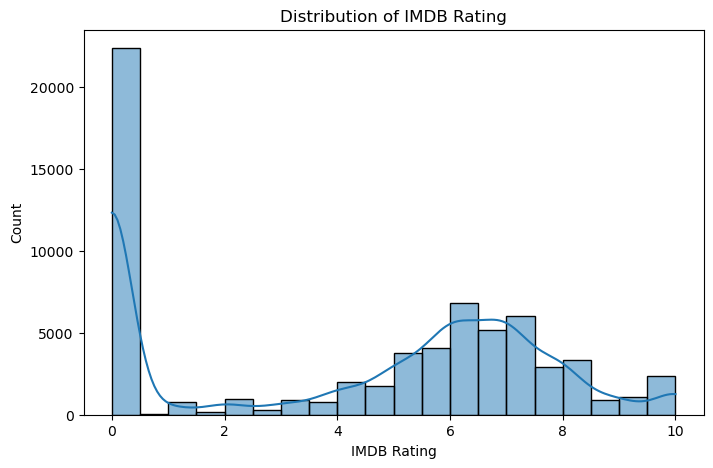

In [15]:
# IMDB 평점 분포
plt.figure(figsize=(8, 5))
sns.histplot(df1['imdb_rating'], bins=20, kde=True)
plt.title('Distribution of IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Count')
plt.show()

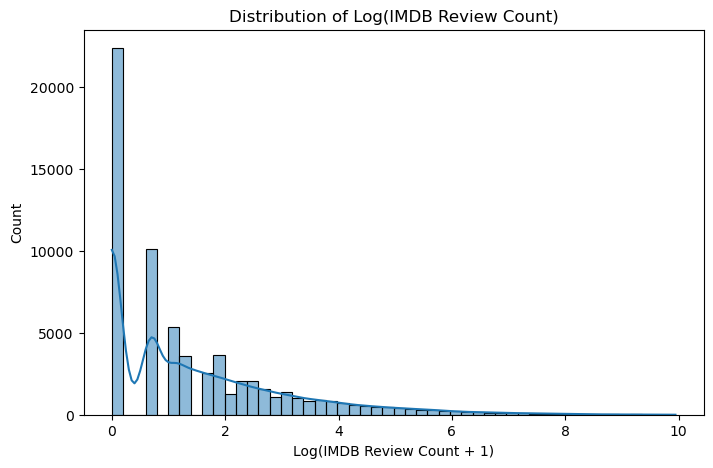

In [16]:
# 리뷰 수
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df1['imdb_review_count']), bins=50, kde=True)
plt.title('Distribution of Log(IMDB Review Count)')
plt.xlabel('Log(IMDB Review Count + 1)')
plt.ylabel('Count')
plt.show()

## 장르별 흥행분석

In [24]:
df1['main_genre'] = df1['genre'].str.split(',').str[0]

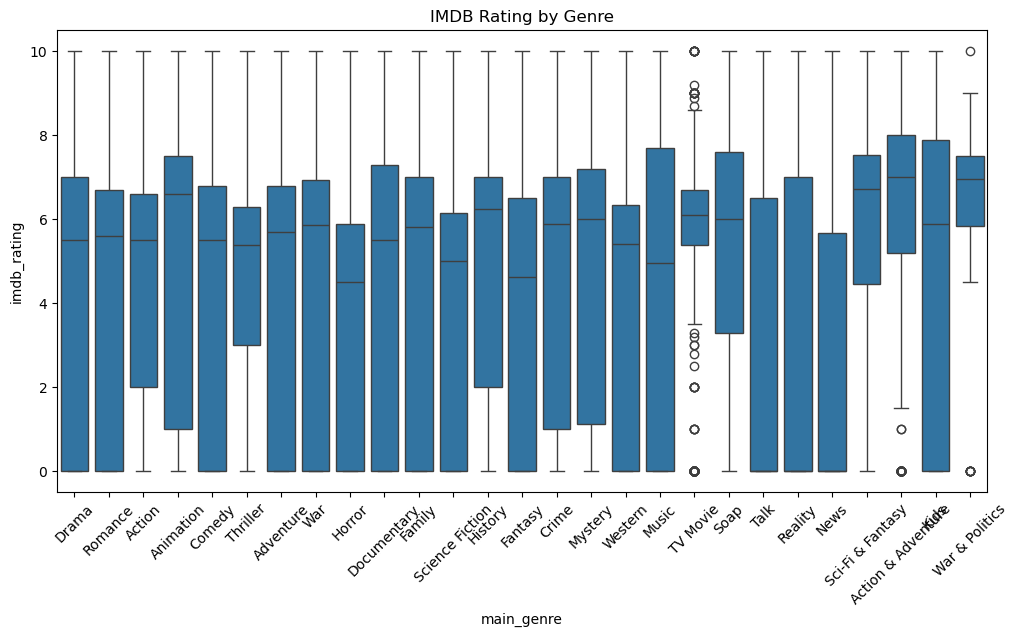

In [25]:
# 장르별 IMDB 평점 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='main_genre', y='imdb_rating')
plt.xticks(rotation=45)
plt.title('IMDB Rating by Genre')
plt.show()

In [27]:
genre_review = df1.groupby('main_genre')['imdb_review_count'].mean().sort_values(ascending=False)

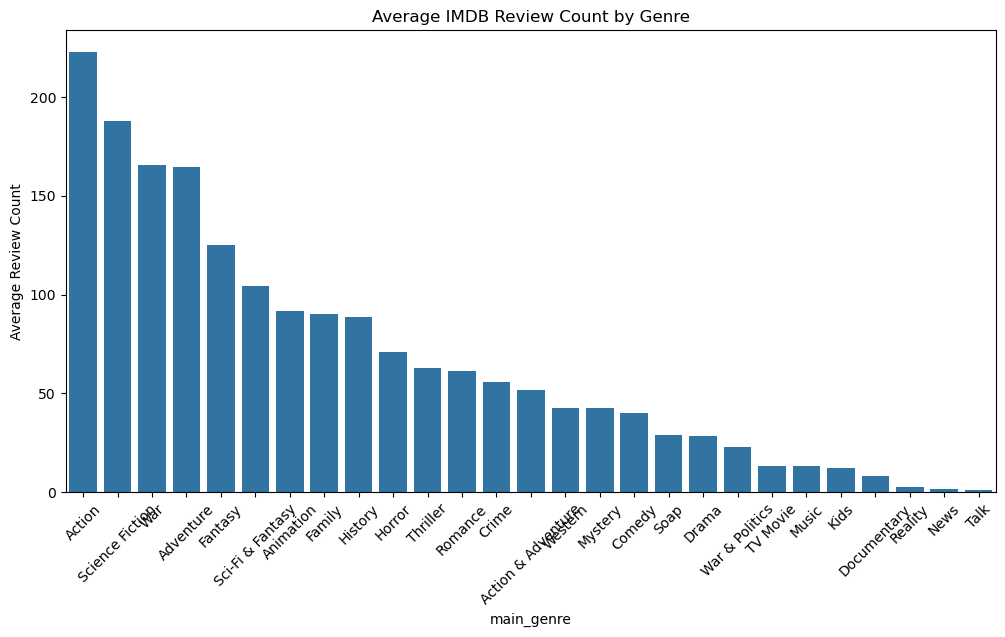

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_review.index, y=genre_review.values)
plt.xticks(rotation=45)
plt.title('Average IMDB Review Count by Genre')
plt.ylabel('Average Review Count')
plt.show()

## 개봉년도별 트렌드

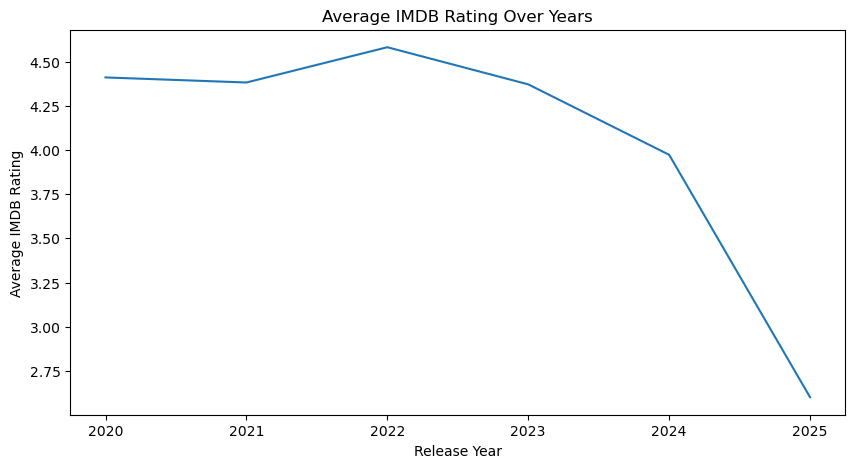

In [30]:
# 연도별 평균 IMDB 평점
year_rating = df1.groupby('release_year')['imdb_rating'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=year_rating.index, y=year_rating.values)
plt.title('Average IMDB Rating Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Rating')
plt.show()

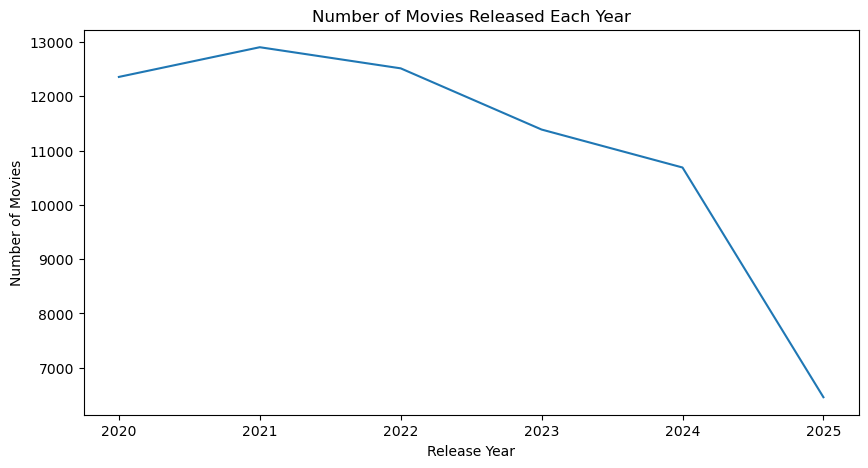

In [32]:
year_count = df1['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=year_count.index, y=year_count.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

## 국가별 장르 분포

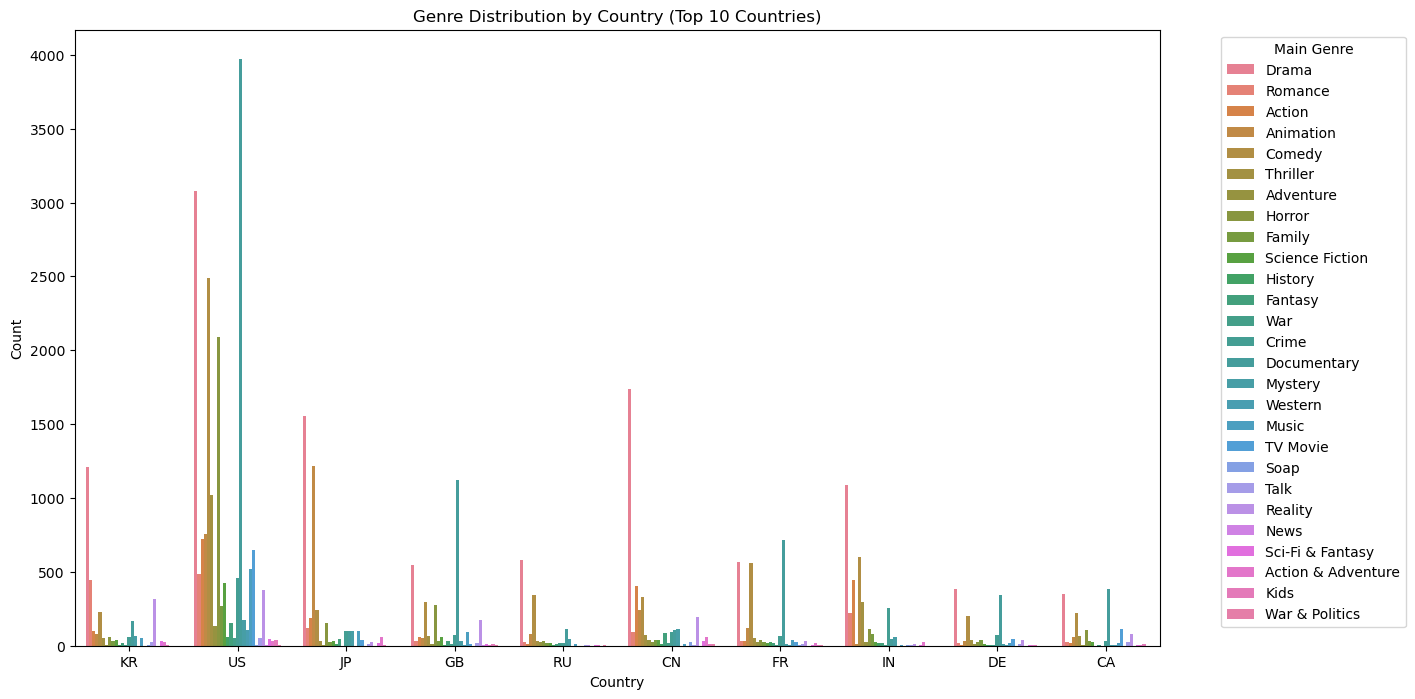

In [35]:
# 상위 10개 국가 선정
top_countries = df1['country'].value_counts().head(10).index

# 해당 국가만 필터링
df1_country_genre = df1[df1['country'].isin(top_countries)].copy()

# 시각화
plt.figure(figsize=(14, 8))
sns.countplot(data=df1_country_genre, x='country', hue='main_genre')
plt.title('Genre Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Main Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 상영시간 vs imdb_rating

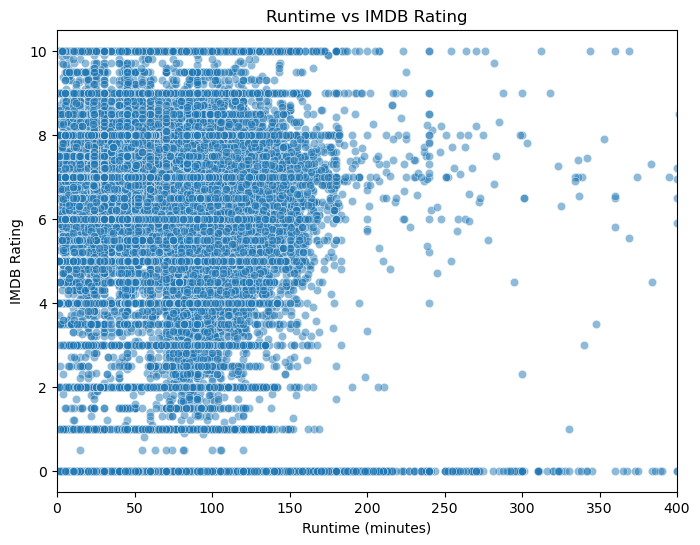

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='runtime', y='imdb_rating', alpha=0.5)
plt.title('Runtime vs IMDB Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')
plt.xlim(0, 400)  # 상영시간 이상치 제외
plt.show()

## 리뷰 수 vs imdb_rating

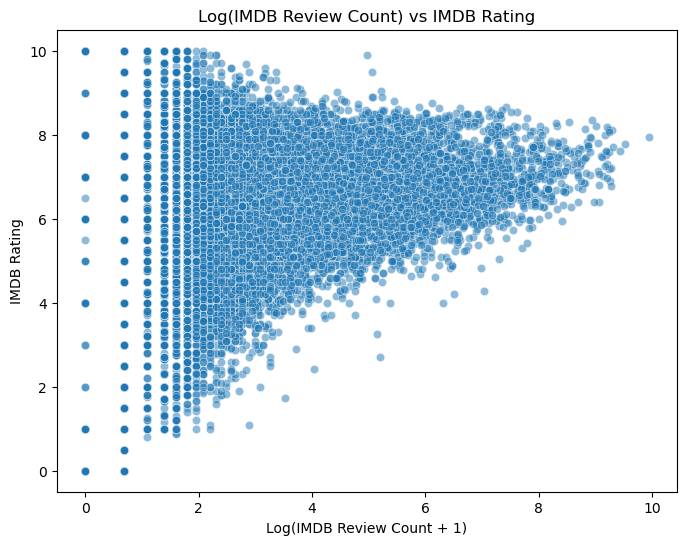

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x=np.log1p(df1['imdb_review_count']), y='imdb_rating', alpha=0.5)
plt.title('Log(IMDB Review Count) vs IMDB Rating')
plt.xlabel('Log(IMDB Review Count + 1)')
plt.ylabel('IMDB Rating')
plt.show()